# Drawing Categories
This notebooks contains the script for drawing the Hasse diagrams used in the notes.
We use the Luxor.jl to do the drawing, together with some auxiliary functions I've implemented
in `luxorcat.jl`.

In [18]:
using Pkg
Pkg.activate(".")

  Activating project at `~/MEGA/EMAp/Mathematical-Short-Notes/Fields/Category-Theory/notebooks`


In [19]:
include("luxorcat.jl")

┌ Warning: Package Luxor does not have MathTeXEngine in its dependencies:
│ - If you have Luxor checked out for development and have
│   added MathTeXEngine as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Luxor
│ Loading MathTeXEngine into Luxor from project dependency, future warnings for Luxor are suppressed.
└ @ nothing nothing:984


In [20]:
using Parameters

In [21]:
@with_kw struct Ob
    label::AbstractString = ""
    pt::Point
end

Ob

In [22]:
function Diagram(;nrows=1, ncols=1,sizerow=40, sizecol=80)
    return Drawing(ncols*sizecol, nrows*sizerow,:svg), Table(nrows,ncols,sizecol,sizerow)
end

function drawobj(pt::Point=O, obj="", labelpos=:S, labeloffset=10; objsize=5)
    circle(pt, objsize,:fill)
    label(obj,labelpos,pt, offset=labeloffset)
end

drawobj (generic function with 5 methods)

### Graph Generating

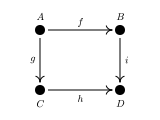

In [164]:
d,p = Diagram(;nrows=2, ncols=2, sizerow=60, sizecol=80)
origin()
# background("antiquewhite")
drawobj(p[1,1],L"A",:N)
drawobj(p[1,2],L"B",:N)
drawobj(p[2,1],L"C",:S)
drawobj(p[2,2],L"D",:S)
morphism(p[1,1],p[2,1],L"g",pos=:W)
morphism(p[1,1],p[1,2],L"f",pos=:N)
morphism(p[2,1],p[2,2],L"h",pos=:S)
morphism(p[1,2],p[2,2],L"i",pos=:E)
finish()
d

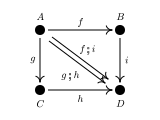

In [254]:
include("luxorcat.jl")
f,p = Diagram(;nrows=2, ncols=2, sizerow=60, sizecol=80)
origin()
# background("antiquewhite")
drawobj(p[1,1],L"A",:N)
drawobj(p[1,2],L"B",:N)
drawobj(p[2,1],L"C",:S)
drawobj(p[2,2],L"D",:S)
morphism(p[1,1],p[2,1],L"g",pos=:W)
morphism(p[1,1],p[1,2],L"f",pos=:N)
morphism(p[2,1],p[2,2],L"h",pos=:S)
morphism(p[1,2],p[2,2],L"i",pos=:E)
@layer begin
    translate(-3,2)
    morphism(p[1,1],p[2,2],"",offset=15)
    # text(Point(0,-10) + (p[1,1]+p[2,2])/2,
    text(L"f ⨟ i", Point(10,-10) + (p[1,1]+p[2,2])/2, halign=:center, valign=:baseline)
end
@layer begin
    translate(0,-2)
    morphism(p[1,1],p[2,2],"",offset=15)
    text(L"g ⨟ h", Point(-10,20) + (p[1,1]+p[2,2])/2, halign=:center, valign=:baseline)
end
finish()
f

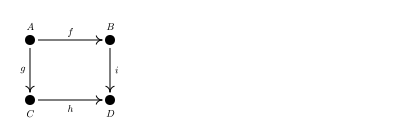

In [163]:
# savediagram(d, "SquareGraph.pdf");

D,p = Diagram(;nrows=1, ncols=3, sizerow=140, sizecol=140)
origin()
placeimage(d, p[1,1], centered=true)
finish()
D

### $1$ Category

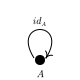

In [23]:
d,p = Diagram(;nrows=2, sizerow=40, sizecol=80)
origin()
# background("antiquewhite")
drawobj(p[2,1],L"A")
morphism(p[2,1], L"id_A")
finish()
savediagram(d, "1Cat.pdf");
d

### $2$ Category

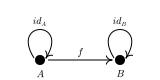

In [24]:
d,p = Diagram(;nrows=2, ncols=2)
origin()
# background("antiquewhite")
drawobj(p[2,1],L"A")
morphism(p[2,1], L"id_A")
drawobj(p[2,2],L"B")
morphism(p[2,2], L"id_B")
morphism(p[2,1],p[2,2])
finish()
savediagram(d, "2Cat.pdf");
d

### $2$ Category omitting identities

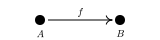

In [25]:
d,p = Diagram(;nrows=1, ncols=2)
origin()
# background("antiquewhite")
drawobj(p[1,1],L"A")
drawobj(p[1,2],L"B")
morphism(p[1,1],p[1,2])

finish()
savediagram(d, "2Catsimple.pdf");
d

### $3$ Category

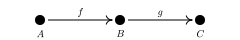

In [26]:
d,p = Diagram(;nrows=1, ncols=3)
origin()
# background("antiquewhite")
drawobj(p[1,1],L"A")
drawobj(p[1,2],L"B")
drawobj(p[1,3],L"C")
morphism(p[1,1],p[1,2],L"f")
morphism(p[1,2],p[1,3],L"g")

finish()
savediagram(d, "3Catsimple.pdf");
d

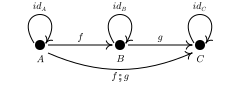

In [27]:
include("luxorcat.jl")
d,p = Diagram(;nrows=3, ncols=3, sizerow=30)
origin()
# background("antiquewhite")
drawobj(p[2,1],L"A")
drawobj(p[2,2],L"B")
drawobj(p[2,3],L"C")
morphism(p[2,1],L"id_A")
morphism(p[2,2],L"id_B")
morphism(p[2,3],L"id_C")

morphism(p[2,1],p[2,2])
morphism(p[2,2],p[2,3],L"g")
morphism(p[2,1],p[2,3],L"f ⨟ g", curve=30)


finish()
savediagram(d, "3CatComplete.pdf");
d

### Preorder

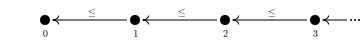

In [28]:
d,p = Diagram(;nrows=1, ncols=4, sizecol=90)
origin()
# background("antiquewhite")
drawobj(p[1,1],L"0")
drawobj(p[1,2],L"1")
drawobj(p[1,3],L"2")
drawobj(p[1,4],L"3")
morphism(p[1,2],p[1,1],L"\leq")
morphism(p[1,3],p[1,2],L"\leq")
morphism(p[1,4],p[1,3],L"\leq")

pl = p[1,4]+Point(40,0)
morphism(pl,p[1,4],"")

circle(pl+Point(-4,0),1,:fill)
circle(pl+Point(0,0),1,:fill)
circle(pl+Point(4,0),1,:fill)

finish()
savediagram(d, "NCat.pdf");
d

### Natural Numbers plus 0 as Monoid $(\mathbb N\cup\{0\},+,0)$

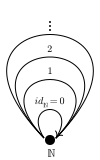

In [29]:
include("luxorcat.jl")
d,p = Diagram(;nrows=2, sizerow=80, sizecol=100)
origin(50,100)
drawobj(p[2,1],L"ℕ")
morphism(p[2,1], L"id_ℕ = 0")
morphism(p[2,1], L"1";loopx = 80,loopy=80,labelyoffset=0,arrowhead=false)
morphism(p[2,1], L"2";loopx = 110,loopy=110,labelyoffset=-8,arrowhead=false)
morphism(p[2,1], "";loopx = 140,loopy=140,labelyoffset=-8,arrowhead=false)
circle(Point(0,-78),1,:fill)
circle(Point(0,-74),1,:fill)
circle(Point(0,-70),1,:fill)
finish()
savediagram(d, "NMonoid.pdf");
d

### Functors Definition
Diagram illustrating that Functors preserve compositions and identities.

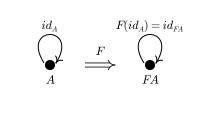

In [47]:
include("luxorcat.jl")
d1 = Drawing(200,130,:svg)
origin()
fontsize(12)

A = Point(-50,0)
circle(A, 5,:fill)
morphism(A,L"id_A")
label(L"A",:S,A, offset=10)

FA = Point(50,0)
circle(FA, 5,:fill)
morphism(FA,L"F(id_A) = id_{F A}")
label(L"FA",:S,FA, offset=10)

p1 = Point(-15,0)
p2 = Point(15,0)
label(L"F",:N, O, offset=10)
bbarrow(p1, p2)

finish()

d1

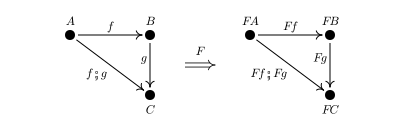

In [48]:
d2 = Drawing(400,130,:svg)
origin()
fontsize(12)

A = Point(-130,-30)
circle(A, 5,:fill)
label(L"A",:N,A, offset=10)

B = Point(-50,-30)
circle(B, 5,:fill)
label(L"B",:N,B, offset=10)

C = Point(-50,30)
circle(C, 5,:fill)
label(L"C",:S,C, offset=10)

morphism(A,B,L"f")
morphism(B,C,L"g",pos=:NW)
morphism(A,C,L"f⨟g",pos=:SW)


FA = Point(50,-30)
circle(FA, 5,:fill)
label(L"FA",:N,FA, offset=10)

FB = Point(130,-30)
circle(FB, 5,:fill)
label(L"FB",:N,FB, offset=10)

FC = Point(130,30)
circle(FC, 5,:fill)
label(L"FC",:S,FC, offset=10)

morphism(FA,FB,L"Ff")
morphism(FB,FC,L"Fg",pos=:NW)
morphism(FA,FC,L"Ff⨟ Fg",pos=:SW)

p1 = Point(-15,0)
p2 = Point(15,0)
label(L"F",:N, O, offset=10)
bbarrow(p1, p2)
finish()
d2

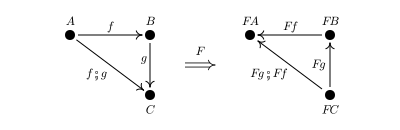

In [49]:
d3 = Drawing(400,130,:svg)
origin()
fontsize(12)

A = Point(-130,-30)
circle(A, 5,:fill)
label(L"A",:N,A, offset=10)

B = Point(-50,-30)
circle(B, 5,:fill)
label(L"B",:N,B, offset=10)

C = Point(-50,30)
circle(C, 5,:fill)
label(L"C",:S,C, offset=10)

morphism(A,B,L"f")
morphism(B,C,L"g",pos=:NW)
morphism(A,C,L"f⨟g",pos=:SW)


FA = Point(50,-30)
circle(FA, 5,:fill)
label(L"FA",:N,FA, offset=10)

FB = Point(130,-30)
circle(FB, 5,:fill)
label(L"FB",:N,FB, offset=10)

FC = Point(130,30)
circle(FC, 5,:fill)
label(L"FC",:S,FC, offset=10)

morphism(FB,FA,L"Ff")
morphism(FC,FB,L"Fg",pos=:W)
morphism(FC,FA,L"Fg⨟ Ff",pos=:SW,offset=10)

p1 = Point(-15,0)
p2 = Point(15,0)
label(L"F",:N, O, offset=10)
bbarrow(p1, p2)
finish()
d3

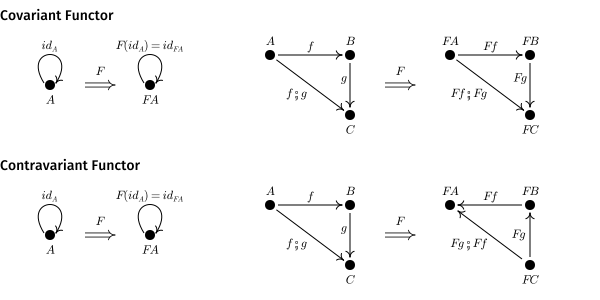

In [50]:
d = Drawing(600,300,:svg)
fontsize(14)
text("Covariant Functor",Point(0,20),halign=:left)
placeimage(d1, Point(0,20))
placeimage(d2, Point(200,20))

fontsize(14)
text("Contravariant Functor",Point(0,170),halign=:left)

placeimage(d1, Point(0,170))
placeimage(d3, Point(200,170))
finish()
savediagram(d, "Functor.pdf");
d

### Span

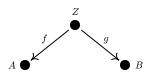

In [125]:
include("luxorcat.jl")
d,p = Diagram(;nrows=2, ncols=3, sizerow=40, sizecol=50)

origin()
translate(0,-10)
translate(0,15)
drawobj(p[2,1],L"A",:W)
drawobj(p[2,3],L"B",:E)
drawobj(p[1,2],L"Z",:N)

morphism(p[1,2],p[2,1], L"f",pos=:NW)
morphism(p[1,2],p[2,3], L"g",pos=:NE)
finish()
savediagram(d, "Span.pdf");
d

### Cospan

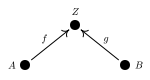

In [124]:
include("luxorcat.jl")
d,p = Diagram(;nrows=2, ncols=3, sizerow=40, sizecol=50)
origin()
translate(0,-10)
translate(0,15)
drawobj(p[2,1],L"A",:W)
drawobj(p[2,3],L"B",:E)
drawobj(p[1,2],L"Z",:N)
morphism(p[2,1],p[1,2], L"f",pos=:NW)
morphism(p[2,3],p[1,2], L"g",pos=:NE)
finish()
savediagram(d, "Cospan.pdf");
d

### Categorical Product

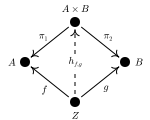

In [122]:
include("luxorcat.jl")
d,p = Diagram(;nrows=3, ncols=3, sizerow=40, sizecol=50)

origin()
translate(0,-13)
translate(0,15)
drawobj(p[2,1],L"A",:W)
drawobj(p[2,3],L"B",:E)
drawobj(p[1,2],L"A\times B",:N)
drawobj(p[3,2],L"Z",:S)

morphism(p[3,2],p[2,1], L"f",pos=:SW)
morphism(p[3,2],p[2,3], L"g",pos=:SE)
morphism(p[1,2],p[2,1], L"\pi_1",pos=:NW)
morphism(p[1,2],p[2,3], L"\pi_2",pos=:NE)

@layer begin
    setcolor("black")
    setdash("dash")
    morphism(p[3,2],p[1,2], "")
    
    setcolor("white")
    pc = (p[3,2]+p[1,2])/2
    circle(pc, 8,:fill)
    setcolor("black")
    text(L"h_{f,g}",pc,halign=:center, valign=:middle)
end
finish()
savediagram(d, "CategoricalProduct.pdf");
d

### Categorical Coproduct

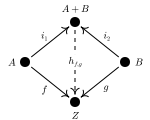

In [134]:
include("luxorcat.jl")
d,p = Diagram(;nrows=3, ncols=3, sizerow=40, sizecol=50)

origin()
translate(0,-13)
translate(0,15)
drawobj(p[2,1],L"A",:W)
drawobj(p[2,3],L"B",:E)
drawobj(p[1,2],L"A + B",:N)
drawobj(p[3,2],L"Z",:S)

morphism(p[2,1],p[3,2], L"f",pos=:SW)
morphism(p[2,3],p[3,2], L"g",pos=:SE)
morphism(p[2,1],p[1,2], L"i_1",pos=:NW)
morphism(p[2,3],p[1,2], L"i_2",pos=:NE)

@layer begin
    setcolor("black")
    setdash("dash")
    morphism(p[1,2],p[3,2], "")
    
    setcolor("white")
    pc = (p[3,2]+p[1,2])/2
    circle(pc, 8,:fill)
    setcolor("black")
    text(L"h_{f,g}",pc,halign=:center, valign=:middle)
end
finish()
savediagram(d, "CategoricalCoproduct.pdf");
d

### Functors - Full, Faithfull and Embeddings

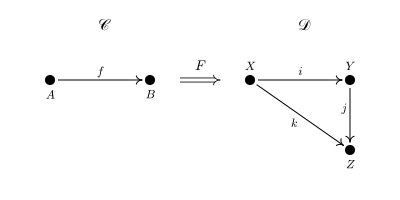

In [51]:
d1 = Drawing(200,200,:svg)
@layer begin
    origin()
    translate(Point(0,-40))
    fontsize(12)

    text(L"𝒞",Point(0,-50),halign=:center)
    a = Point(-50,0)
    circle(a, 5,:fill)
    label(L"A",:S, a, offset=10)
    b = Point(50,0)
    circle(b, 5,:fill)
    label(L"B",:S,b, offset=10)
    morphism(a,b)
end

    finish()


d2 = Drawing(200,200,:svg)
@layer begin
    origin()
    translate(Point(0,-40))
    fontsize(12)
    text(L"𝒟",Point(0,-50),halign=:center)

    X = Point(-50,-0)
    circle(X, 5,:fill)
    label(L"X",:N,X, offset=10)

    Y = Point(50,-0)
    circle(Y, 5,:fill)
    label(L"Y",:N,Y, offset=10)

    Z = Point(50,70)
    circle(Z, 5,:fill)
    label(L"Z",:S,Z, offset=10)

    morphism(X,Y,L"i")
    morphism(Y,Z,L"j",pos=:NW)
    morphism(X,Z,L"k",pos=:SW)
end
finish()

d = Drawing(400,200,:svg)
@layer begin
    fontsize(14)

    placeimage(d1, Point(0,20))
    placeimage(d2, Point(200,20))
    origin()
    label(L"F",:N,Point(0,-20), offset=10)
    bbarrow(Point(-20,-20), Point(20,-20))
end

finish()
# savediagram(d, "Functor.pdf");
d

### Natural Transformation

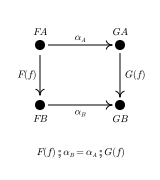

In [52]:
d,p = Diagram(;nrows=3, ncols=2, sizerow=60)

origin()
translate(0,15)
drawobj(p[1,1],L"FA",:N)
drawobj(p[1,2],L"GA",:N)
drawobj(p[2,1],L"FB")
drawobj(p[2,2],L"GB")
morphism(p[1,1],p[1,2], L"\alpha_A",pos=:N)
morphism(p[2,1],p[2,2], L"\alpha_B",pos=:S)
morphism(p[1,1],p[2,1], L"F(f)",pos=:W, offset=10)
morphism(p[1,2],p[2,2], L"G(f)",pos=:E)
text(L"F(f)⨟\alpha_B = \alpha_A ⨟ G(f)",Point(0,50),halign=:center)
finish()
savediagram(d, "NaturalTransformation.pdf");
d